# Random Forest

Parameters Tuning:

- None
-

Input datasets:

- Min-Max Normalized
- Z-Score Standardized


In [7]:
# Define global variables
ALGORITHM_NAME = "Random Forest"


def visualize_confusion_matrices(conf_mat_empatica, conf_mat_samsung, params, scaling):
    # Create a single figure for both confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Visualize the confusion matrix for Empatica model
    # Guidance for visualizing the CMs in one figure, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    axes[0].imshow(conf_mat_empatica, cmap="Blues")
    axes[0].set_title(f"{ALGORITHM_NAME} ({params}) - {scaling} - Empatica Model")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_xticks([0, 1])
    axes[0].set_yticks([0, 1])
    for i in range(conf_mat_empatica.shape[0]):
        for j in range(conf_mat_empatica.shape[1]):
            axes[0].text(
                j,
                i,
                str(conf_mat_empatica[i, j]),
                ha="center",
                va="center",
                color="black",
            )

    # Visualize the confusion matrix for Samsung model
    axes[1].imshow(conf_mat_samsung, cmap="Blues")
    axes[1].set_title(f"{ALGORITHM_NAME} ({params}) - {scaling} - Samsung Model")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    axes[1].set_xticks([0, 1])
    axes[1].set_yticks([0, 1])
    for i in range(conf_mat_samsung.shape[0]):
        for j in range(conf_mat_samsung.shape[1]):
            axes[1].text(
                j,
                i,
                str(conf_mat_samsung[i, j]),
                ha="center",
                va="center",
                color="black",
            )

    plt.tight_layout()
    plt.show()

## Simple Implementation

No parameters tuning


Empatica Model (RF) Accuracy: 0.41975308641975306
Samsung Model (RF) Accuracy: 0.7448559670781894

Classification Report (Empatica Model RF):
               precision    recall  f1-score   support

           0       0.01      0.00      0.00       486
           1       0.46      0.84      0.59       486

    accuracy                           0.42       972
   macro avg       0.23      0.42      0.30       972
weighted avg       0.23      0.42      0.30       972


Classification Report (Samsung Model RF):
               precision    recall  f1-score   support

           0       1.00      0.49      0.66       486
           1       0.66      1.00      0.80       486

    accuracy                           0.74       972
   macro avg       0.83      0.74      0.73       972
weighted avg       0.83      0.74      0.73       972


Confusion Matrix (Empatica Model RF):
 [[  1 485]
 [ 79 407]]

Confusion Matrix (Samsung Model RF):
 [[239 247]
 [  1 485]]


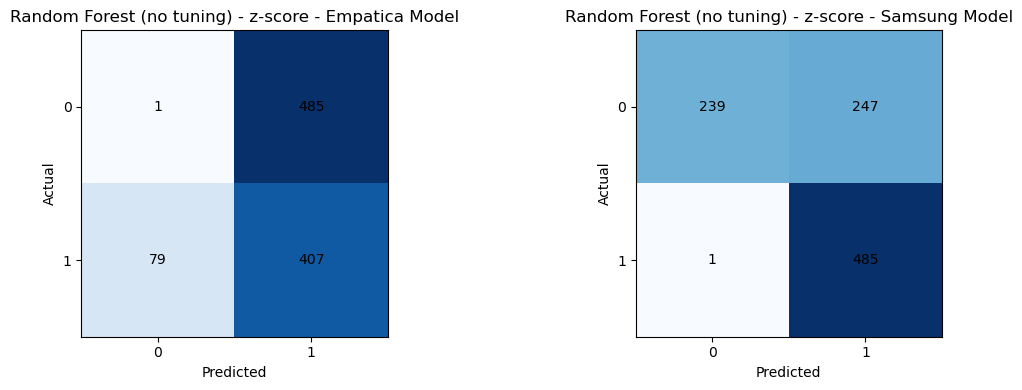

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define dataset scaling
SCALING = "z-score"

# Define file paths
training_file_path = f"./data/6-data-split/{SCALING}/a_training.csv"
testing_file_path = f"./data/6-data-split/{SCALING}/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define Random Forest models
model_empatica_rf = RandomForestClassifier(random_state=42, max_depth=20)
model_samsung_rf = RandomForestClassifier(random_state=42, max_depth=20)

# Guidance for flatten each feature separately to a one-dimensional array, provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
X_train_empatica_flattened = np.hstack(
    [
        X_train_empatica[col].values.flatten()[:, np.newaxis]
        for col in X_train_empatica.columns
    ]
)

X_test_empatica_flattened = np.hstack(
    [
        X_test_empatica[col].values.flatten()[:, np.newaxis]
        for col in X_test_empatica.columns
    ]
)

# Train the models
model_empatica_rf.fit(X_train_empatica_flattened, y_train_empatica)
model_samsung_rf.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_rf = model_empatica_rf.predict(X_test_empatica_flattened)
y_pred_samsung_rf = model_samsung_rf.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_rf = accuracy_score(y_test_empatica, y_pred_empatica_rf)
accuracy_samsung_rf = accuracy_score(y_test_samsung, y_pred_samsung_rf)

print("Empatica Model (RF) Accuracy:", accuracy_empatica_rf)
print("Samsung Model (RF) Accuracy:", accuracy_samsung_rf)

# Classification report
print(
    "\nClassification Report (Empatica Model RF):\n",
    classification_report(y_test_empatica, y_pred_empatica_rf),
)
print(
    "\nClassification Report (Samsung Model RF):\n",
    classification_report(y_test_samsung, y_pred_samsung_rf),
)

# Confusion matrix
conf_mat_empatica_rf = confusion_matrix(y_test_empatica, y_pred_empatica_rf)
conf_mat_samsung_rf = confusion_matrix(y_test_samsung, y_pred_samsung_rf)

print("\nConfusion Matrix (Empatica Model RF):\n", conf_mat_empatica_rf)
print("\nConfusion Matrix (Samsung Model RF):\n", conf_mat_samsung_rf)

# Visualize the CMs
visualize_confusion_matrices(
    conf_mat_empatica_rf, conf_mat_samsung_rf, "no tuning", SCALING
)

## Parameters tuning


Empatica Model (RF) Accuracy: 0.4434156378600823
Samsung Model (RF) Accuracy: 0.7489711934156379

Classification Report (Empatica Model RF):
               precision    recall  f1-score   support

           0       0.02      0.00      0.00       486
           1       0.47      0.88      0.61       486

    accuracy                           0.44       972
   macro avg       0.24      0.44      0.31       972
weighted avg       0.24      0.44      0.31       972


Classification Report (Samsung Model RF):
               precision    recall  f1-score   support

           0       1.00      0.50      0.66       486
           1       0.67      1.00      0.80       486

    accuracy                           0.75       972
   macro avg       0.83      0.75      0.73       972
weighted avg       0.83      0.75      0.73       972


Confusion Matrix (Empatica Model RF):
 [[  1 485]
 [ 56 430]]

Confusion Matrix (Samsung Model RF):
 [[242 244]
 [  0 486]]


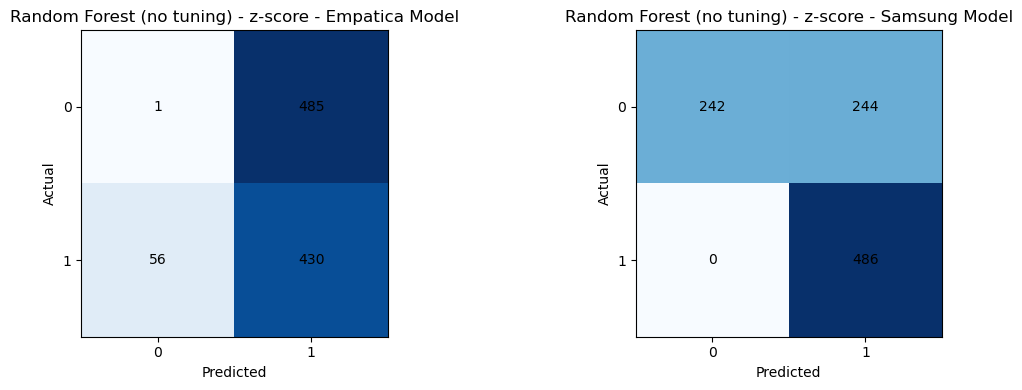

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define dataset scaling
SCALING = "z-score"

# Define file paths
training_file_path = f"./data/6-data-split/{SCALING}/a_training.csv"
testing_file_path = f"./data/6-data-split/{SCALING}/b_testing.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Define params
params = {
    "random_state": 4,
    "max_depth": 20,
    "min_samples_leaf": 2,
    "max_features": "sqrt",
    "n_estimators": 100,
}
# Define Random Forest models
model_empatica_rf = RandomForestClassifier(**params)
model_samsung_rf = RandomForestClassifier(**params)

# Train the models
model_empatica_rf.fit(X_train_empatica, y_train_empatica)
model_samsung_rf.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_rf = model_empatica_rf.predict(X_test_empatica)
y_pred_samsung_rf = model_samsung_rf.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_rf = accuracy_score(y_test_empatica, y_pred_empatica_rf)
accuracy_samsung_rf = accuracy_score(y_test_samsung, y_pred_samsung_rf)

print("Empatica Model (RF) Accuracy:", accuracy_empatica_rf)
print("Samsung Model (RF) Accuracy:", accuracy_samsung_rf)

# Classification report
print(
    "\nClassification Report (Empatica Model RF):\n",
    classification_report(y_test_empatica, y_pred_empatica_rf),
)
print(
    "\nClassification Report (Samsung Model RF):\n",
    classification_report(y_test_samsung, y_pred_samsung_rf),
)

# Confusion matrix
conf_mat_empatica_rf = confusion_matrix(y_test_empatica, y_pred_empatica_rf)
conf_mat_samsung_rf = confusion_matrix(y_test_samsung, y_pred_samsung_rf)

print("\nConfusion Matrix (Empatica Model RF):\n", conf_mat_empatica_rf)
print("\nConfusion Matrix (Samsung Model RF):\n", conf_mat_samsung_rf)

# Visualize the CMs
visualize_confusion_matrices(
    conf_mat_empatica_rf, conf_mat_samsung_rf, "no tuning", SCALING
)

## Model Optimization Process


In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for both models
# Guidance for Grid Search Parameter Optimization provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
params_empatica = {
    "max_depth": [10, 20, 30],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [100, 200, 300],
}

params_samsung = {
    "max_depth": [10, 20, 30],
    "min_samples_leaf": [1, 2, 4],
    "n_estimators": [100, 200, 300],
}

# Define RandomForestClassifier models
model_empatica_rf = RandomForestClassifier(random_state=42)
model_samsung_rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters for Empatica
# Guidance for Grid Search Parameter Optimization provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
grid_search_empatica = GridSearchCV(
    estimator=model_empatica_rf, param_grid=params_empatica, cv=5
)
grid_search_empatica.fit(X_train_empatica, y_train_empatica)

# Perform grid search to find the best hyperparameters for Samsung
# Guidance for Grid Search Parameter Optimization provided by ChatGPT
# Specific implementation details were adapted for the purposes of this project.
grid_search_samsung = GridSearchCV(
    estimator=model_samsung_rf, param_grid=params_samsung, cv=5
)
grid_search_samsung.fit(X_train_samsung, y_train_samsung)

# Get the best hyperparameters for Empatica and Samsung
best_params_empatica = grid_search_empatica.best_params_
best_params_samsung = grid_search_samsung.best_params_

# Train the Empatica Random Forest classifier with the best hyperparameters
best_model_empatica_rf = RandomForestClassifier(random_state=42, **best_params_empatica)
best_model_empatica_rf.fit(X_train_empatica, y_train_empatica)

# Train the Samsung Random Forest classifier with the best hyperparameters
best_model_samsung_rf = RandomForestClassifier(random_state=42, **best_params_samsung)
best_model_samsung_rf.fit(X_train_samsung, y_train_samsung)

# Make predictions for Empatica and Samsung
y_pred_empatica_rf = best_model_empatica_rf.predict(X_test_empatica)
y_pred_samsung_rf = best_model_samsung_rf.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_rf = accuracy_score(y_test_empatica, y_pred_empatica_rf)
accuracy_samsung_rf = accuracy_score(y_test_samsung, y_pred_samsung_rf)

print("Best params Empatica:", best_params_empatica)
print("Best params Samsung:", best_params_samsung, "\n")
print("Best Empatica model Acc:", accuracy_empatica_rf)
print("Best Samsung model Acc:", accuracy_samsung_rf)

Best params Empatica: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Best params Samsung: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 300} 

Best Empatica model Acc: 0.42592592592592593
Best Samsung model Acc: 0.7510288065843621
